# Knife Edge Measurements Testing
---
## Module near field image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


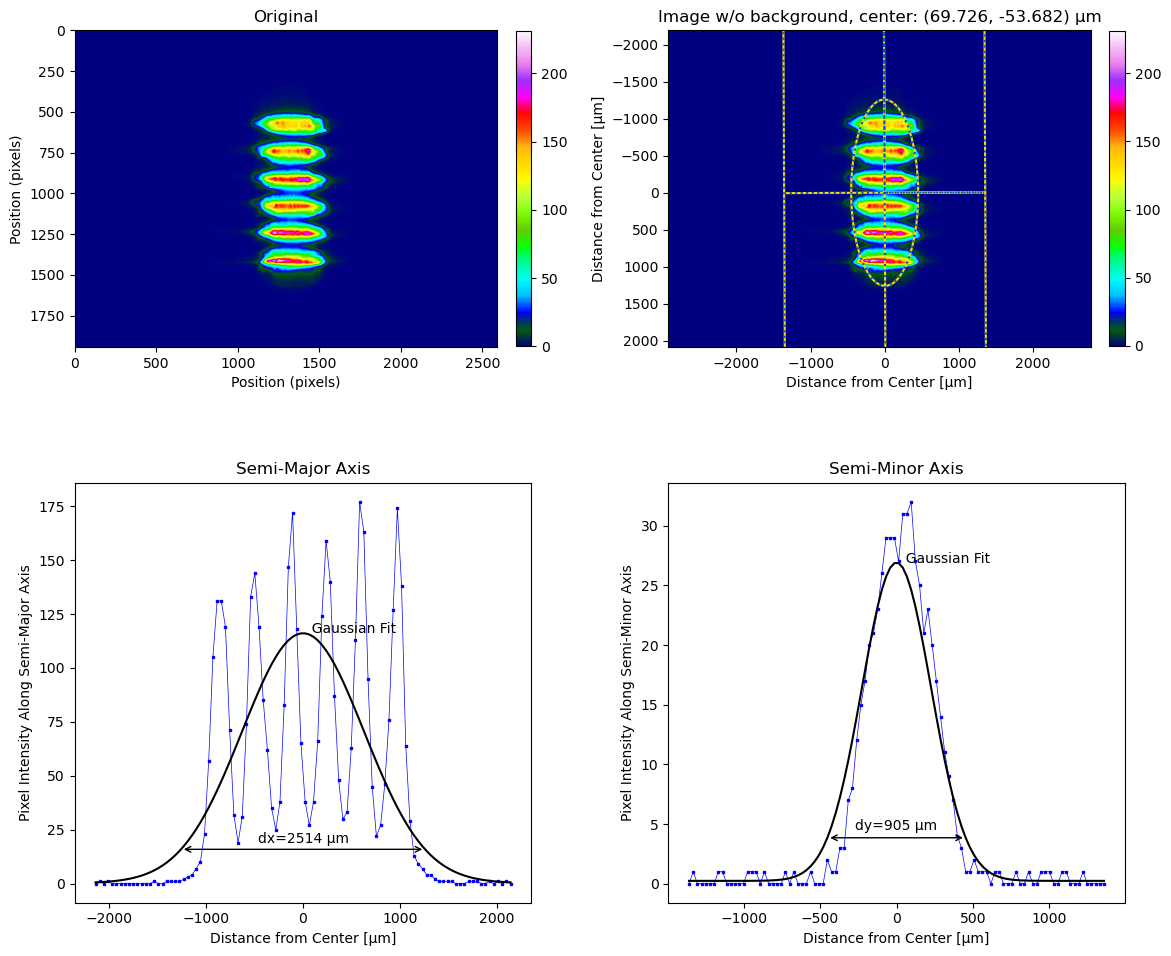

In [15]:
%load_ext autoreload
%autoreload 2

import sys
import os
# from inspect import getmembers, isfunction
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Import from this directory so we can rapidly test
sys.path.append('../') # Needed for import
import laserbeamtools as lbs

def load_img(file, folder = r'../tests/test_beam_profiles/DAS'):
    """ Load an image into an array """
    full_path = folder + '/' + file
    if os.path.isfile(full_path):
        iobj = Image.open(full_path)
        img = np.asarray(iobj)
        return img
    else:
        print("No file found under:")
        print(full_path)
        return None

# x, y, dx, dy, phi = lbs.beam_size(img)
# print("The center of the beam ellipse is at (%.0f, %.0f)" % (x, y))
# print("The ellipse diameter (closest to horizontal) is %.0f pixels" % dx)
# print("The ellipse diameter (closest to   vertical) is %.0f pixels" % dy)
# print("The ellipse is rotated %.0f° ccw from the horizontal" % (phi * 180/3.1416))

img = load_img('nf_100_1234.bmp')
lbs.plot_image_analysis(img, pixel_size=2.2)
plt.show()

## Module Far Fields
### Far Field From Rows 1 & 2

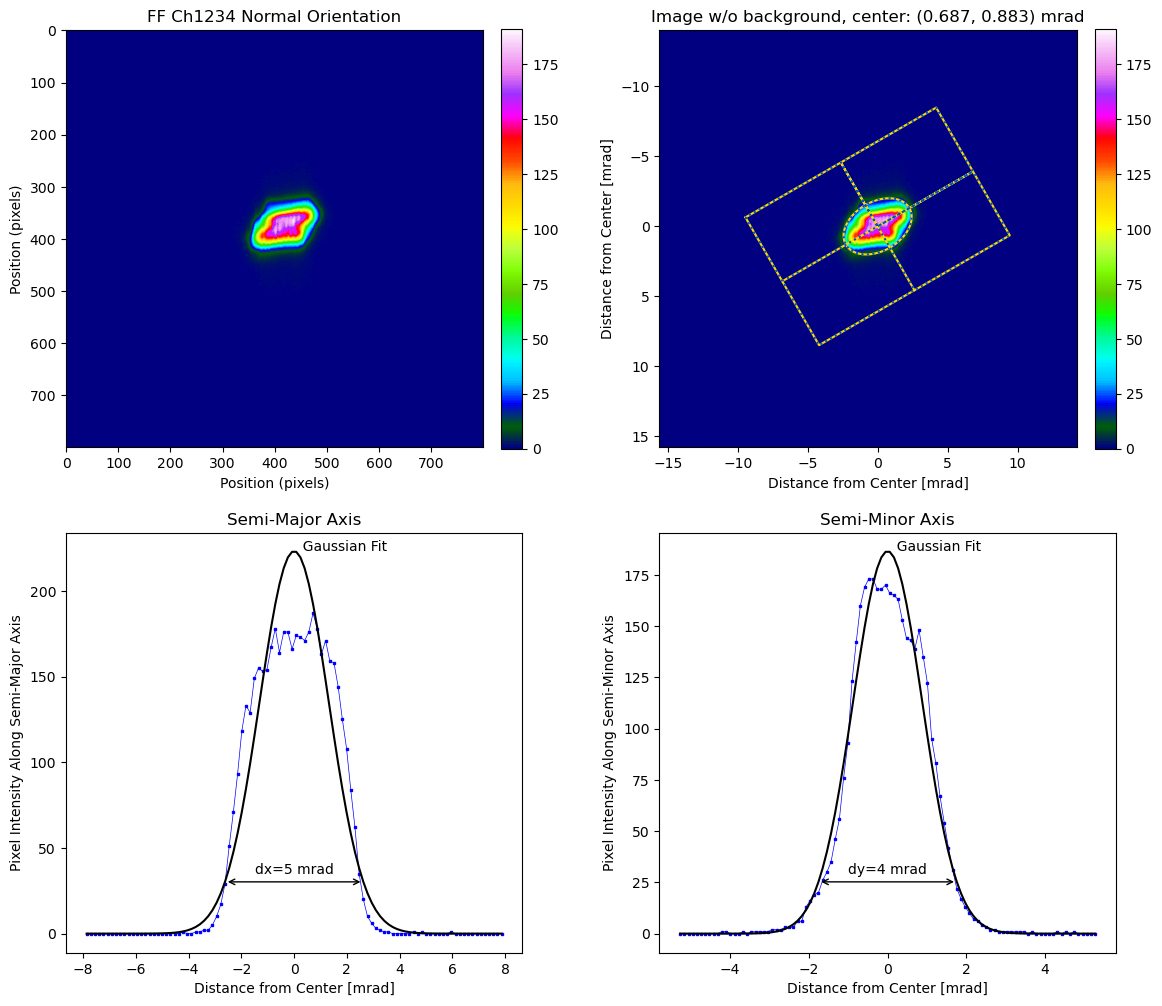

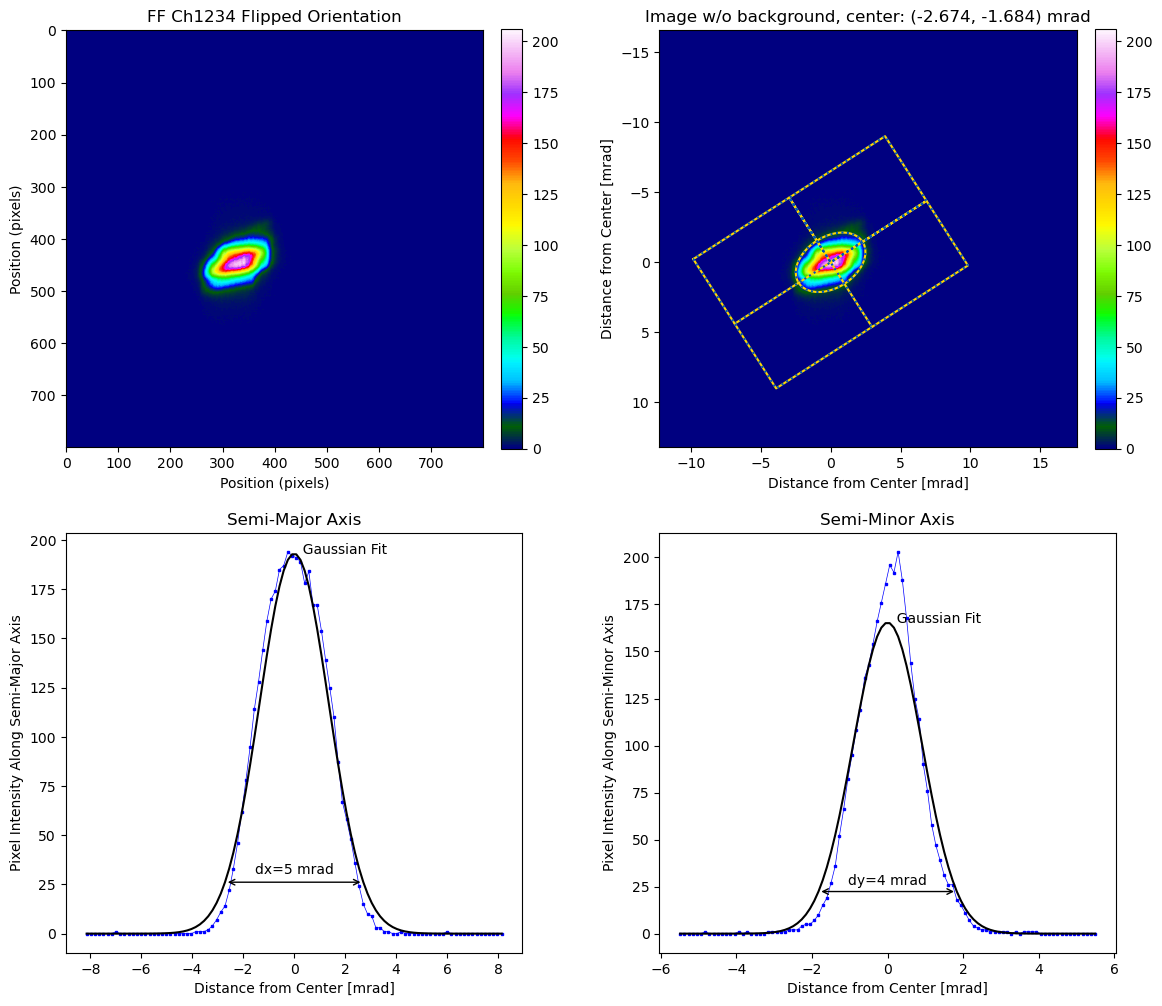

In [16]:

img = load_img('ff_1234.bmp')
y,x =img.shape

y = int(y/2) # Y center
x = int(x/2) # X center
d = 400

img = img[y-d:y+d,x-d:x+d]

# img = img/np.sum(img)
lbs.plot_image_analysis(img, pixel_size=2.2, title='FF Ch1234 Normal Orientation', far_field_lens=59, units='mrad')
plt.show()

img = load_img('ff_flip_1234.bmp')
img = img[y-d:y+d,x-d:x+d]
lbs.plot_image_analysis(img, pixel_size=2.2, title='FF Ch1234 Flipped Orientation', far_field_lens=59, units='mrad')
plt.show()

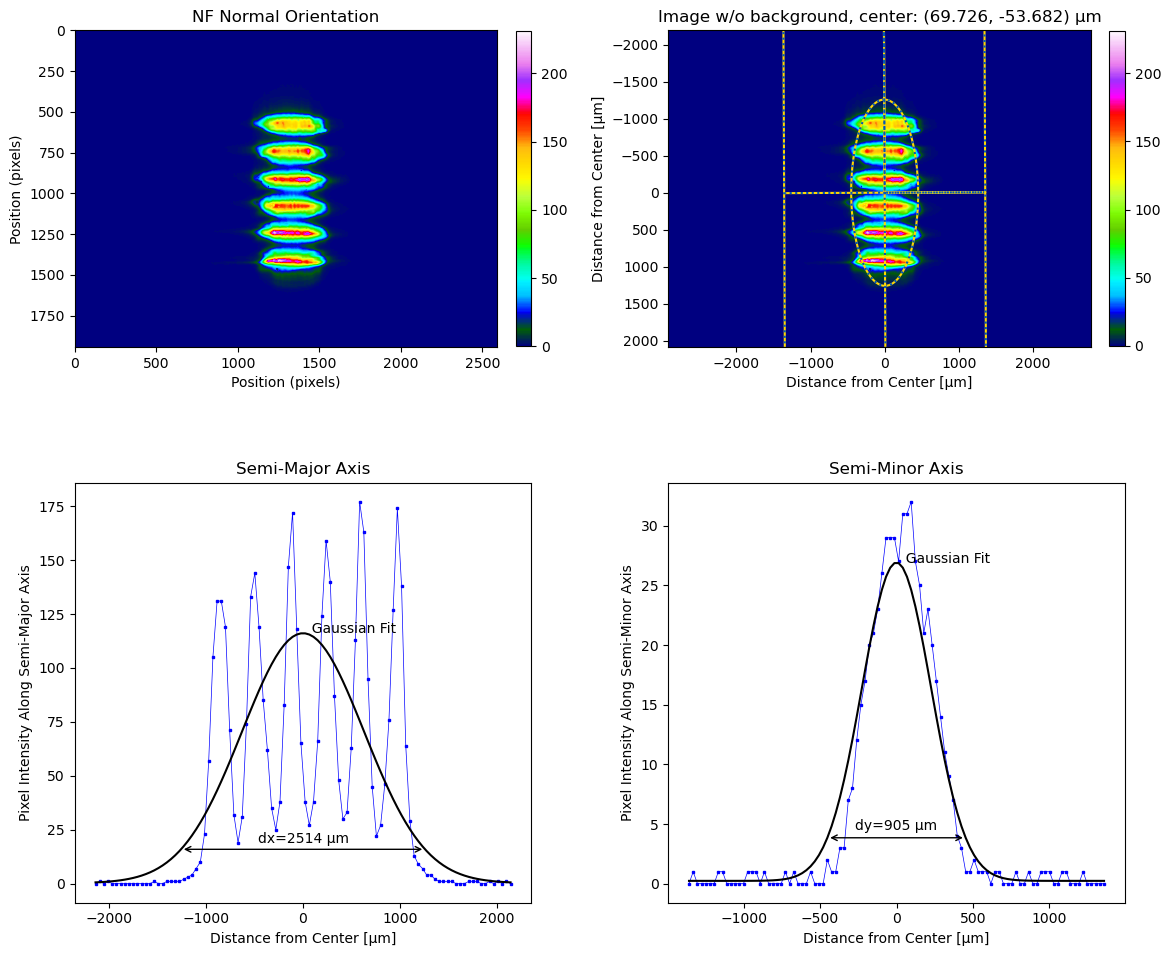

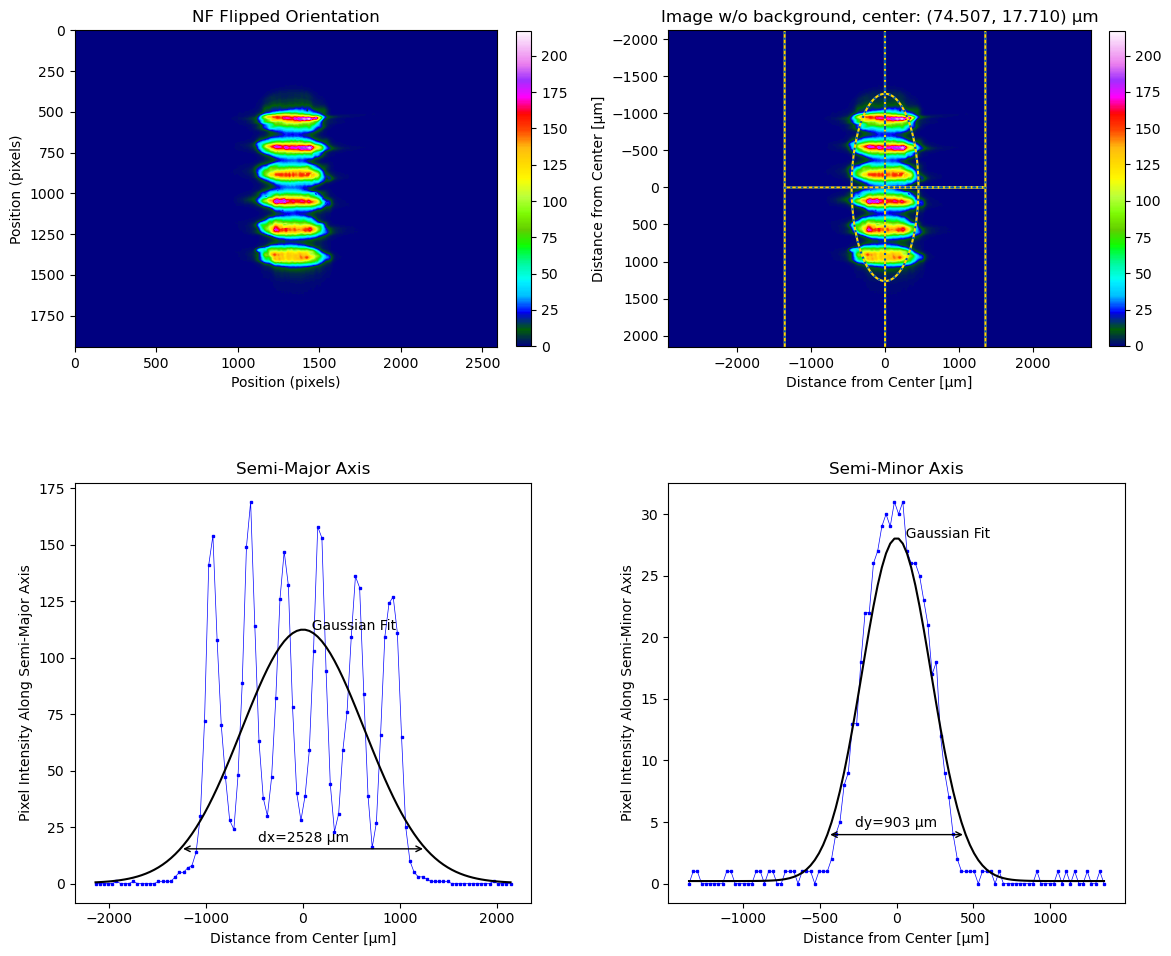

In [19]:
img = load_img('nf_100_1234.bmp')
lbs.plot_image_analysis(img, pixel_size=2.2, title = 'NF Normal Orientation')
plt.show()

img = load_img('nf_flip_1234.bmp')
lbs.plot_image_analysis(img, pixel_size=2.2, title = 'NF Flipped Orientation')
plt.show()